# Project 4 : Wrangle and Analyze Data

### Table of content 

- Intoduction
- Gathering Data
- Assessing Data
- Cleaning
- Visualization
- Storing data


#### Introduction

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.


In [1]:
import pandas as pd, numpy as np 
import requests
import os 
import matplotlib.pyplot as plt 
%matplotlib inline 


In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')


In [3]:
df_json  = pd.read_json('tweet_json1.txt',lines = True)

In [4]:

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [5]:
# Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')



## Assessing 

In [6]:
copy_twitter = twitter_archive.copy()
copy_json = df_json.copy()
copy_image = image_prediction.copy()

In [7]:
# first ,
twitter_archive .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
twitter_archive .describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [10]:
df3 = df_json[['id','favorite_count','retweet_count','retweeted_status','source','lang','favorited','retweeted']].copy()

In [11]:
df3

,id,favorite_count,retweet_count,retweeted_status,source,lang,favorited,retweeted
0,892420643555336193,39467,8853,NaN,"<a href=""http://twitter.com/download/iphone"" r...",en,False,False
1,892177421306343426,33819,6514,NaN,"<a href=""http://twitter.com/download/iphone"" r...",en,False,False
2,891815181378084864,25461,4328,NaN,"<a href=""http://twitter.com/download/iphone"" r...",en,False,False
3,891689557279858688,42908,8964,NaN,"<a href=""http://twitter.com/download/iphone"" r...",en,False,False
4,891327558926688256,41048,9774,NaN,"<a href=""http://twitter.com/download/iphone"" r...",en,False,False
...,...,...,...,...,...,...,...,...
2349,666049248165822465,111,41,NaN,"<a href=""http://twitter.com/download/iphone"" r...",en,False,False
2350,666044226329800704,311,147,NaN,"<a href=""http://twitter.com/download/iphone"" r...",en,False,False
2351,666033412701032449,128,47,NaN,"<a href=""http://twitter.com/download/iphone"" r...",en,False,False
2352,666029285002620928,132,48,NaN,"<a href=""http://twitter.com/download/iphone"" r...",en,False,False


In [12]:
df3['lang'].value_counts()

en     2336
und       7
in        3
nl        3
et        1
tl        1
es        1
ro        1
eu        1
Name: lang, dtype: int64

In [13]:
df3['retweeted'].value_counts()

False    2354
Name: retweeted, dtype: int64

In [14]:
df3= df3.drop(['retweeted','retweeted_status'],axis= 1)

In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
 3   source          2354 non-null   object
 4   lang            2354 non-null   object
 5   favorited       2354 non-null   bool  
dtypes: bool(1), int64(3), object(2)
memory usage: 94.4+ KB


In [16]:
df3['user']= df_json['user']

In [17]:
df3.head()

,id,favorite_count,retweet_count,source,lang,favorited,user
0,892420643555336193,39467,8853,"<a href=""http://twitter.com/download/iphone"" r...",en,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,33819,6514,"<a href=""http://twitter.com/download/iphone"" r...",en,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,25461,4328,"<a href=""http://twitter.com/download/iphone"" r...",en,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891689557279858688,42908,8964,"<a href=""http://twitter.com/download/iphone"" r...",en,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,891327558926688256,41048,9774,"<a href=""http://twitter.com/download/iphone"" r...",en,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [18]:
twitter_archive 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [19]:
image_prediction.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
817,692894228850999298,https://pbs.twimg.com/media/CZ2nn7BUsAI2Pj3.jpg,1,German_short-haired_pointer,0.876977,True,bluetick,0.036615,True,basset,0.017848,True
1386,766069199026450432,https://pbs.twimg.com/media/CqGf3xaXYAEh3ak.jpg,1,redbone,0.484855,True,beagle,0.437527,True,basset,0.010585,True
707,685169283572338688,https://pbs.twimg.com/media/CYI10WhWsAAjzii.jpg,1,Bernese_mountain_dog,0.975096,True,Appenzeller,0.014578,True,EntleBucher,0.005943,True
1080,718234618122661888,https://pbs.twimg.com/media/CfeukpmW4AEGjOE.jpg,1,malamute,0.370152,True,Siberian_husky,0.356398,True,Eskimo_dog,0.271042,True
1285,750719632563142656,https://pbs.twimg.com/media/CmsXg9AWgAAs6Ui.jpg,1,Pembroke,0.972587,True,Cardigan,0.014772,True,basenji,0.005798,True
692,684222868335505415,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False
760,688828561667567616,https://pbs.twimg.com/media/CY816snW8AYltrQ.jpg,1,Cardigan,0.614231,True,skunk,0.139392,False,toilet_tissue,0.031158,False
1012,709519240576036864,https://pbs.twimg.com/media/Cdi3-f7W8AUOm9T.jpg,1,cocker_spaniel,0.414982,True,Newfoundland,0.225482,True,flat-coated_retriever,0.196789,True
1352,759923798737051648,https://pbs.twimg.com/media/CovKqSYVIAAUbUW.jpg,1,Labrador_retriever,0.324579,True,seat_belt,0.109168,False,pug,0.102466,True


In [20]:
df3.sample(25)

,id,favorite_count,retweet_count,source,lang,favorited,user
715,783821107061198850,8209,2269,"<a href=""http://twitter.com/download/iphone"" r...",en,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1834,676098748976615425,3279,1623,"<a href=""http://twitter.com/download/iphone"" r...",en,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
530,808106460588765185,9701,2525,"<a href=""http://twitter.com/download/iphone"" r...",en,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1396,699775878809702401,2150,690,"<a href=""http://twitter.com/download/iphone"" r...",en,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1997,672523490734551040,696,189,"<a href=""http://twitter.com/download/iphone"" r...",en,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
12,889665388333682689,38818,8538,"<a href=""http://twitter.com/download/iphone"" r...",en,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
755,778650543019483137,6430,1729,"<a href=""http://twitter.com/download/iphone"" r...",en,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1512,691090071332753408,1867,385,"<a href=""http://twitter.com/download/iphone"" r...",en,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
373,828372645993398273,13756,3344,"<a href=""http://twitter.com/download/iphone"" r...",en,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2271,667470559035432960,273,102,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",en,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [21]:
twitter_archive.duplicated().sum()

0

In [22]:
twitter_archive [['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [23]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [25]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [26]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [27]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [28]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [29]:
pd.set_option('display.max_colwidth', -1)
 
# printing data frame
print(twitter_archive.source)

0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
                                               ...                                        
2351    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2352    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2353    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2354    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2355    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

<ipython-input-29-22570c3f6448>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [30]:
twitter_archive.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1991,672622327801233409,NaN,NaN,2015-12-04 03:43:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This lil pupper is sad because we haven't found Kony yet. RT to spread awareness. 12/10 would pet firmly https://t.co/Cv7dRdcMvQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672622327801233409/photo/1,12,10,None,None,None,pupper,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT until we find this dog. Clearly a cool dog (front leg relaxed out window). Looks to be a superb driver. 10/10 https://t.co/MnTrKaQ8Wn,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971617296384/photo/1,10,10,None,None,None,None,None
2022,672068090318987265,NaN,NaN,2015-12-02 15:01:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Gizmo. He's upset because he's not sure if he's really big or the shopping cart is really small. 7/10 https://t.co/XkMtCGhr4a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672068090318987265/photo/1,7,10,Gizmo,None,None,None,None
2220,668484198282485761,NaN,NaN,2015-11-22 17:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Good teamwork between these dogs. One is on lookout while other eats. Long necks. Nice big house. 9/10s good pups https://t.co/uXgmECGYEB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668484198282485761/photo/1,9,10,None,None,None,None,None
15,889278841981685760,NaN,NaN,2017-07-24 00:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek https://t.co/WpHvrQedPb,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889278841981685760/video/1,13,10,Oliver,None,None,None,None
678,789268448748703744,NaN,NaN,2016-10-21 00:53:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stella. She's happier than I will ever be. 10/10 would trade lives with https://t.co/JSs2bfDtTS,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789268448748703744/photo/1,10,10,Stella,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827256086533/photo/1,10,10,the,None,None,None,None
1994,672604026190569472,NaN,NaN,2015-12-04 02:31:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a baby Rand Paul. Curls for days. 11/10 would cuddle the hell out of https://t.co/xHXNaPAYRe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672604026190569472/photo/1,11,10,a,None,None,None,None
2069,671134062904504320,NaN,NaN,2015-11-30 01:10:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Clarence. He's a western Alkaline Pita. Very proud of himself for dismembering his stuffed dog pal 8/10 https://t.co/BHxr9O7wJY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671134062904504320/photo/1,8,10,Clarence,None,None,None,None
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Indie. She's not a fan of baths but she's definitely a fan of hide &amp; seek. 12/10 click the link to help Indie\n\nhttps://t.co/fvGkIuAlFK https://t.co/kiCFtmJd7l,NaN,NaN,N

In [31]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [32]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
image_prediction.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1383,765669560888528897,https://pbs.twimg.com/media/CqA0XcYWAAAzltT.jpg,1,beagle,0.993333,True,Walker_hound,0.002902,True,basset,0.002415,True
179,669324657376567296,https://pbs.twimg.com/media/CUnrN7vUcAAfGvN.jpg,1,seashore,0.201659,False,Cardigan,0.131544,True,sandbar,0.101430,False
1241,747103485104099331,https://pbs.twimg.com/media/Cl4-pevXEAAb8VW.jpg,1,Labrador_retriever,0.991954,True,golden_retriever,0.002228,True,doormat,0.001404,False
555,677662372920729601,https://pbs.twimg.com/media/CWeKTZTWsAA5R3Z.jpg,1,cowboy_hat,0.256110,False,trench_coat,0.127086,False,cloak,0.071439,False
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1501,784431430411685888,https://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg,1,miniature_poodle,0.744819,True,toy_poodle,0.243192,True,standard_poodle,0.010920,True
373,672988786805112832,https://pbs.twimg.com/media/CVbvjKqW4AA_CuD.jpg,1,Lakeland_terrier,0.836632,True,West_Highland_white_terrier,0.073900,True,wire-haired_fox_terrier,0.038160,True
1465,778624900596654080,https://pbs.twimg.com/media/Cs47N3eWcAEmgiW.jpg,2,Airedale,0.786089,True,Irish_terrier,0.121488,True,Lakeland_terrier,0.014603,True
504,675888385639251968,https://pbs.twimg.com/media/CWE85snWIAEG5ES.jpg,1,West_Highland_white_terrier,0.672117,True,Old_English_sheepdog,0.146147,True,komondor,0.023141,True
1143,730196704625098752,https://pbs.twimg.com/media/CiIuBwCUgAAAGbz.jpg,1,hand_blower,0.296145,False,chain_mail,0.262271,False,toilet_seat,0.149497,False


In [34]:
image_prediction.tweet_id.duplicated().sum()

0

In [35]:
image_prediction[image_prediction.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


# Observations:

##### twitter_enhanced :

- timestamp must be datetime

- all dogs have to be in one column 

- source should be cleaned...

- denominator has values other than 10

- numerator has invaild numbers

- missing data 

- delete None values 

#### image_df : 

- jpg_url columns has duplicate rows
- p1,p2,p3 should be category and should be in one column
- p1_conf,p2_conf_p3_conf should be in one columns 

#### all tables should be combined.

## cleaning

In [36]:
# for cleaning part, we should take a copy of the df.

twitter_archive_clean = twitter_archive.copy()
df_json_clean = df3.copy()
image_prediction_clean=image_prediction.copy()

In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [38]:
# 
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

In [39]:
# first we will delete unused columns
twitter_archive_clean = twitter_archive_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_id','retweeted_status_timestamp'],axis=1)


In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   text                2175 non-null   object
 3   expanded_urls       2117 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [41]:


twitter_archive_clean.name.value_counts()

None       680
a          55 
Lucy       11 
Charlie    11 
Oliver     10 
           .. 
Ziva       1  
Venti      1  
Eugene     1  
Thor       1  
Horace     1  
Name: name, Length: 956, dtype: int64

In [42]:
#replacing None with np.nan
twitter_archive_clean.name.replace('None',np.nan,inplace = True)
twitter_archive_clean.name.replace('a',np.nan, inplace = True)
twitter_archive_clean.name.value_counts()

Lucy       11
Charlie    11
Oliver     10
Cooper     10
Tucker     9 
          .. 
Loomis     1 
Lassie     1 
Kawhi      1 
Raphael    1 
Autumn     1 
Name: name, Length: 954, dtype: int64

In [43]:
# convert timestamp into datetime

twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean['timestamp'])


In [44]:
#test 
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   expanded_urls       2117 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                1440 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 203.9+ KB


In [45]:
# replacing None with np.nan
twitter_archive_clean.pupper = twitter_archive_clean.pupper.replace(to_replace='None', value=np.nan).dropna()
twitter_archive_clean.doggo = twitter_archive_clean.doggo.replace(to_replace='None', value=np.nan).dropna()
twitter_archive_clean.floofer = twitter_archive_clean.floofer.replace(to_replace='None', value=np.nan).dropna()
twitter_archive_clean.puppo = twitter_archive_clean.puppo.replace(to_replace='None', value=np.nan).dropna()



In [46]:
#test
twitter_archive_clean.pupper.value_counts()

pupper    234
Name: pupper, dtype: int64

In [47]:
# Create one columns for all the dogs and then change the type into category

new_col = ['doggo','floofer','pupper','puppo']
twitter_archive_clean['dogs'] =  twitter_archive_clean[new_col].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)

twitter_archive_clean.dogs = twitter_archive_clean.dogs.astype('category')

# drop the columns
twitter_archive_clean = twitter_archive_clean.drop(columns = new_col,axis = 1)

In [48]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   expanded_urls       2117 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                1440 non-null   object             
 7   dogs                2175 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 138.4+ KB


In [49]:
twitter_archive_clean.dogs.value_counts()

                  1831
pupper            224 
doggo             75  
puppo             24  
doggo, pupper     10  
floofer           9   
doggo, puppo      1   
doggo, floofer    1   
Name: dogs, dtype: int64

In [50]:
twitter_archive_clean.rating_denominator.value_counts()

10     2153
50     3   
80     2   
11     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [51]:
# checking for null values 
twitter_archive_clean.rating_numerator.isnull().sum()

0

In [52]:
# any numerator above 15 will be 15 , and any numerator above 10 will be 10
twitter_archive_clean.loc[twitter_archive_clean.rating_numerator > 15,['rating_numerator']] = 15
twitter_archive_clean.loc[twitter_archive_clean.rating_numerator > 10,['rating_denominator']] = 10
twitter_archive_clean.query('rating_numerator>15')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dogs


### now cleaning image and json_df datasets

In [53]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [54]:
image_prediction_clean.tweet_id.value_counts().sum()


2075

In [55]:
image_prediction_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
193,669571471778410496,https://pbs.twimg.com/media/CUrLsI-UsAALfUL.jpg,1,minivan,0.873488,False,pickup,0.041259,False,beach_wagon,0.015400,False
1656,810657578271330305,https://pbs.twimg.com/media/C0AIwgVXAAAc1Ig.jpg,1,malamute,0.753521,True,Siberian_husky,0.166151,True,Eskimo_dog,0.069811,True
363,672877615439593473,https://pbs.twimg.com/media/CVaKn75XAAEU09u.jpg,1,Chihuahua,0.412362,True,beagle,0.068066,True,borzoi,0.045071,True
1620,802952499103731712,https://pbs.twimg.com/media/CySpCSHXcAAN-qC.jpg,1,chow,0.944032,True,golden_retriever,0.017240,True,Pomeranian,0.012085,True
792,690728923253055490,https://pbs.twimg.com/media/CZX2SxaXEAEcnR6.jpg,1,kuvasz,0.422806,True,golden_retriever,0.291586,True,Great_Pyrenees,0.076189,True
1977,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True
1177,737800304142471168,https://pbs.twimg.com/media/Cj0xdMBVAAEbDHp.jpg,1,malamute,0.374682,True,Norwegian_elkhound,0.334853,True,limousine,0.068173,False
1851,840370681858686976,https://pbs.twimg.com/media/C6mYrK0UwAANhep.jpg,1,teapot,0.981819,False,cup,0.014026,False,coffeepot,0.002421,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
1747,823322678127919110,https://pbs.twimg.com/media/C20HmaKWgAQ6-6X.jpg,2,cowboy_boot,0.990253,False,Chihuahua,0.001836,True,papillon,0.001274,True


In [56]:
sum(image_prediction_clean['p3_dog']==False)

576

In [57]:
# i will use only tweet_id and jpg_url, no need for the rest
image_prediction_clean = image_prediction_clean.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf'],axis = 1)

In [58]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   int64 
 1   jpg_url   2075 non-null   object
 2   p3_dog    2075 non-null   bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 34.6+ KB


In [59]:
# i missed one column
image_prediction_clean = image_prediction_clean.drop(['p3_dog'],axis =1)

In [60]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
 3   source          2354 non-null   object
 4   lang            2354 non-null   object
 5   favorited       2354 non-null   bool  
 6   user            2354 non-null   object
dtypes: bool(1), int64(3), object(3)
memory usage: 112.8+ KB


In [61]:
# i will drop the user column , maybe there is a mistake

df_json_clean = df_json_clean.drop(['user','retweet_count'],axis = 1 )

In [62]:
df_json_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [63]:
# it seems there is 3 types of souces 

df_json_clean['source'] = df_json_clean['source'].apply(lambda x: x.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone'))
df_json_clean['source'] = df_json_clean['source'].apply(lambda x: x.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter for Web'))
df_json_clean['source'] = df_json_clean['source'].apply(lambda x: x.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck'))


In [64]:
sum(df_json_clean['source']=='<TweetDeck')

0

In [65]:
#testing
df_json_clean.source.value_counts()

Twitter for iPhone                                                 2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>    91  
Twitter for Web                                                    33  
TweetDeck                                                          11  
Name: source, dtype: int64

In [66]:
#delete the forth row 
df_json_clean = df_json_clean[df_json_clean["source"].str.contains('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>') == False]


In [67]:
#test
df_json_clean.source.value_counts()

Twitter for iPhone    2219
Twitter for Web       33  
TweetDeck             11  
Name: source, dtype: int64

In [68]:
#rename the 'id' column name to 'tweet_id'
df_json_clean.rename(columns={'id':'tweet_id'},inplace = True)

In [69]:
#now i need to merge all table together

from functools import reduce
DataFrames = [df_json_clean, image_prediction_clean, twitter_archive_clean]
twitter_archive_master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id', how='inner'), DataFrames)

In [70]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   favorite_count      1994 non-null   int64              
 2   source              1994 non-null   object             
 3   lang                1994 non-null   object             
 4   favorited           1994 non-null   bool               
 5   jpg_url             1994 non-null   object             
 6   timestamp           1994 non-null   datetime64[ns, UTC]
 7   text                1994 non-null   object             
 8   expanded_urls       1994 non-null   object             
 9   rating_numerator    1994 non-null   int64              
 10  rating_denominator  1994 non-null   int64              
 11  name                1393 non-null   object             
 12  dogs                1994 non-null 

### Visualization part 

In [71]:
twitter_archive_master.name.value_counts()

Charlie         11
Lucy            10
Oliver          10
Cooper          10
Tucker          9 
               .. 
Einstein        1 
Shikha          1 
Cleopatricia    1 
Sparky          1 
Horace          1 
Name: name, Length: 934, dtype: int64

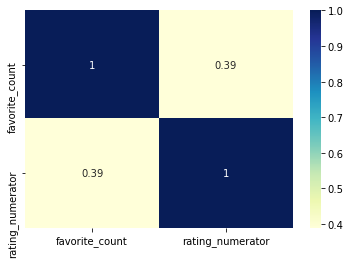

In [72]:
# using correlation heaatmap 
import seaborn as sns 

dataplot = sns.heatmap(twitter_archive_master[['favorite_count','rating_numerator']].corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [73]:
twitter_archive_master.dogs.value_counts(normalize=True)

                  0.846540
pupper            0.101805
doggo             0.031595
puppo             0.011033
doggo, pupper     0.004514
floofer           0.003511
doggo, puppo      0.000502
doggo, floofer    0.000502
Name: dogs, dtype: float64

In [74]:
twitter_archive_master.groupby(['dogs']).favorite_count.sum().sort_values(ascending=False)

dogs
                  14312425
pupper            1461141 
doggo             1219452 
puppo             474806  
doggo, pupper     112798  
floofer           92442   
doggo, puppo      47844   
doggo, floofer    17169   
Name: favorite_count, dtype: int64

In [75]:
#twitter_archive_master.dogs.replace('None',np.nan,inplace = True)

In [76]:

#define data
#data = twitter_archive_clean.dogs.value_counts()
#labels = ['None', 'pupper', 'doggo', 'floofer', 'puppo']

#define colors
#colors = sns.color_palette('pastel')[0:5]

#pie chart 
#plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
#plt.show()

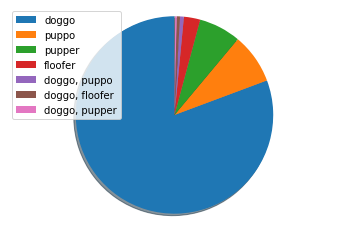

In [77]:
#creating a pir chart for the dogs 

labels = twitter_archive_master.dogs.unique().tolist()[1:]
sizes = twitter_archive_master.groupby(['dogs']).favorite_count.sum().sort_values(ascending=False).tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes,shadow=True, startangle=90)
plt.legend(labels)
ax1.axis('equal')

plt.show()



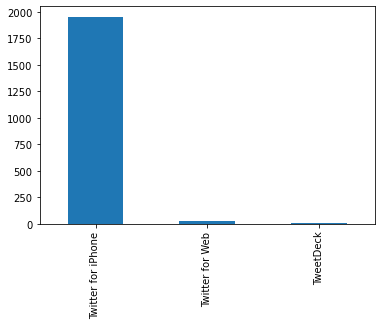

In [78]:
#plotting the source
twitter_archive_master.source.value_counts().plot(kind="bar")

In [79]:
#save file to csv
twitter_archive_master.to_csv('twitter_archive_master.csv',sep='\t',encoding='utf-8')